In [1]:
#Random Forest Regression Model

#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reading the dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1209934c5ccb45bf822798fd39d9ab74 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yRmV_A-dPiRK6jAN29ROPpLK9baCT5L-g8Lf7cc6ZO7H',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1209934c5ccb45bf822798fd39d9ab74.get_object(Bucket='exhaustmonitoringsystem-donotdelete-pr-ezicbxvs5grdwa',Key='dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = pd.read_csv(body)
dataset.head()

,Name,PM2.5,CO,NO2,AQI_CO,AQI_NO2,AQI_PM2.5,AQI_Site,Fine
0,Civic,36.28,0.00,NaN,0.0,0.0,145,145.0,50000
1,Monash,45.83,0.64,0.0,7.0,0.0,183,183.0,50000
2,Florey,32.98,0.50,0.0,5.0,0.0,131,131.0,0
3,Monash,44.70,0.65,0.0,7.0,0.0,178,178.0,50000
4,Florey,28.93,0.50,0.0,5.0,0.0,115,115.0,0


In [3]:
#Replacing the categorial values in a dataset using numberical values
dataset["Name"] = dataset["Name"].replace(["Civic", "Florey", "Monash"], [0,1,2])

In [4]:
#Checking the null values in a dataset
dataset.isnull().any()

Name         False
PM2.5        False
CO            True
NO2           True
AQI_CO        True
AQI_NO2       True
AQI_PM2.5    False
AQI_Site      True
Fine         False
dtype: bool

In [5]:
#Rounding the decimal values in the dataset
dataset['PM2.5']= round(dataset['PM2.5'])


In [6]:
#Splitting the dataset into dependent and independent values
X = dataset.iloc[:,:2].values
y = dataset.iloc[:,8].values

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
#Predicting the results of the Test data
y_pred=regressor.predict(X_test)

In [10]:
#Predicting a new result
y_pred1 = regressor.predict([[0,36]])
y_pred2 = regressor.predict([[2,46]])
y_pred3 = regressor.predict([[1,33]])

In [11]:
y_pred1

array([50000.])

In [12]:
y_pred2

array([50000.])

In [13]:
y_pred3

array([0.])

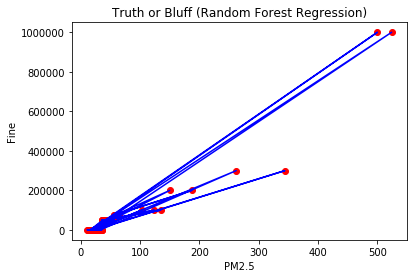

In [14]:
#Visualization between PM2.5 and Fine
plt.scatter(X[:,1:2], y, color = 'red')
plt.plot(X[:,1:2],y, color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('PM2.5')
plt.ylabel('Fine')
plt.show()

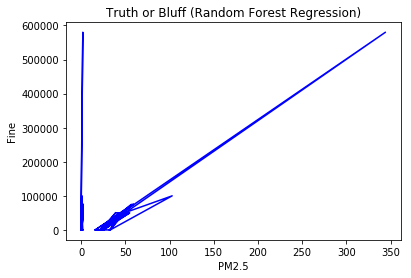

In [15]:

#Visualization between X_test and regressor.predict(X_test)
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('PM2.5')
plt.ylabel('Fine')
plt.show()

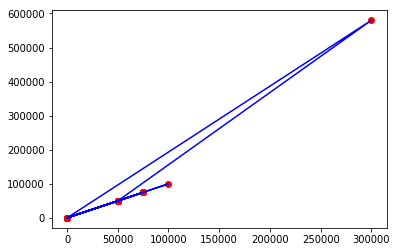

In [16]:
#Visualization between y_test and y_pred
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')

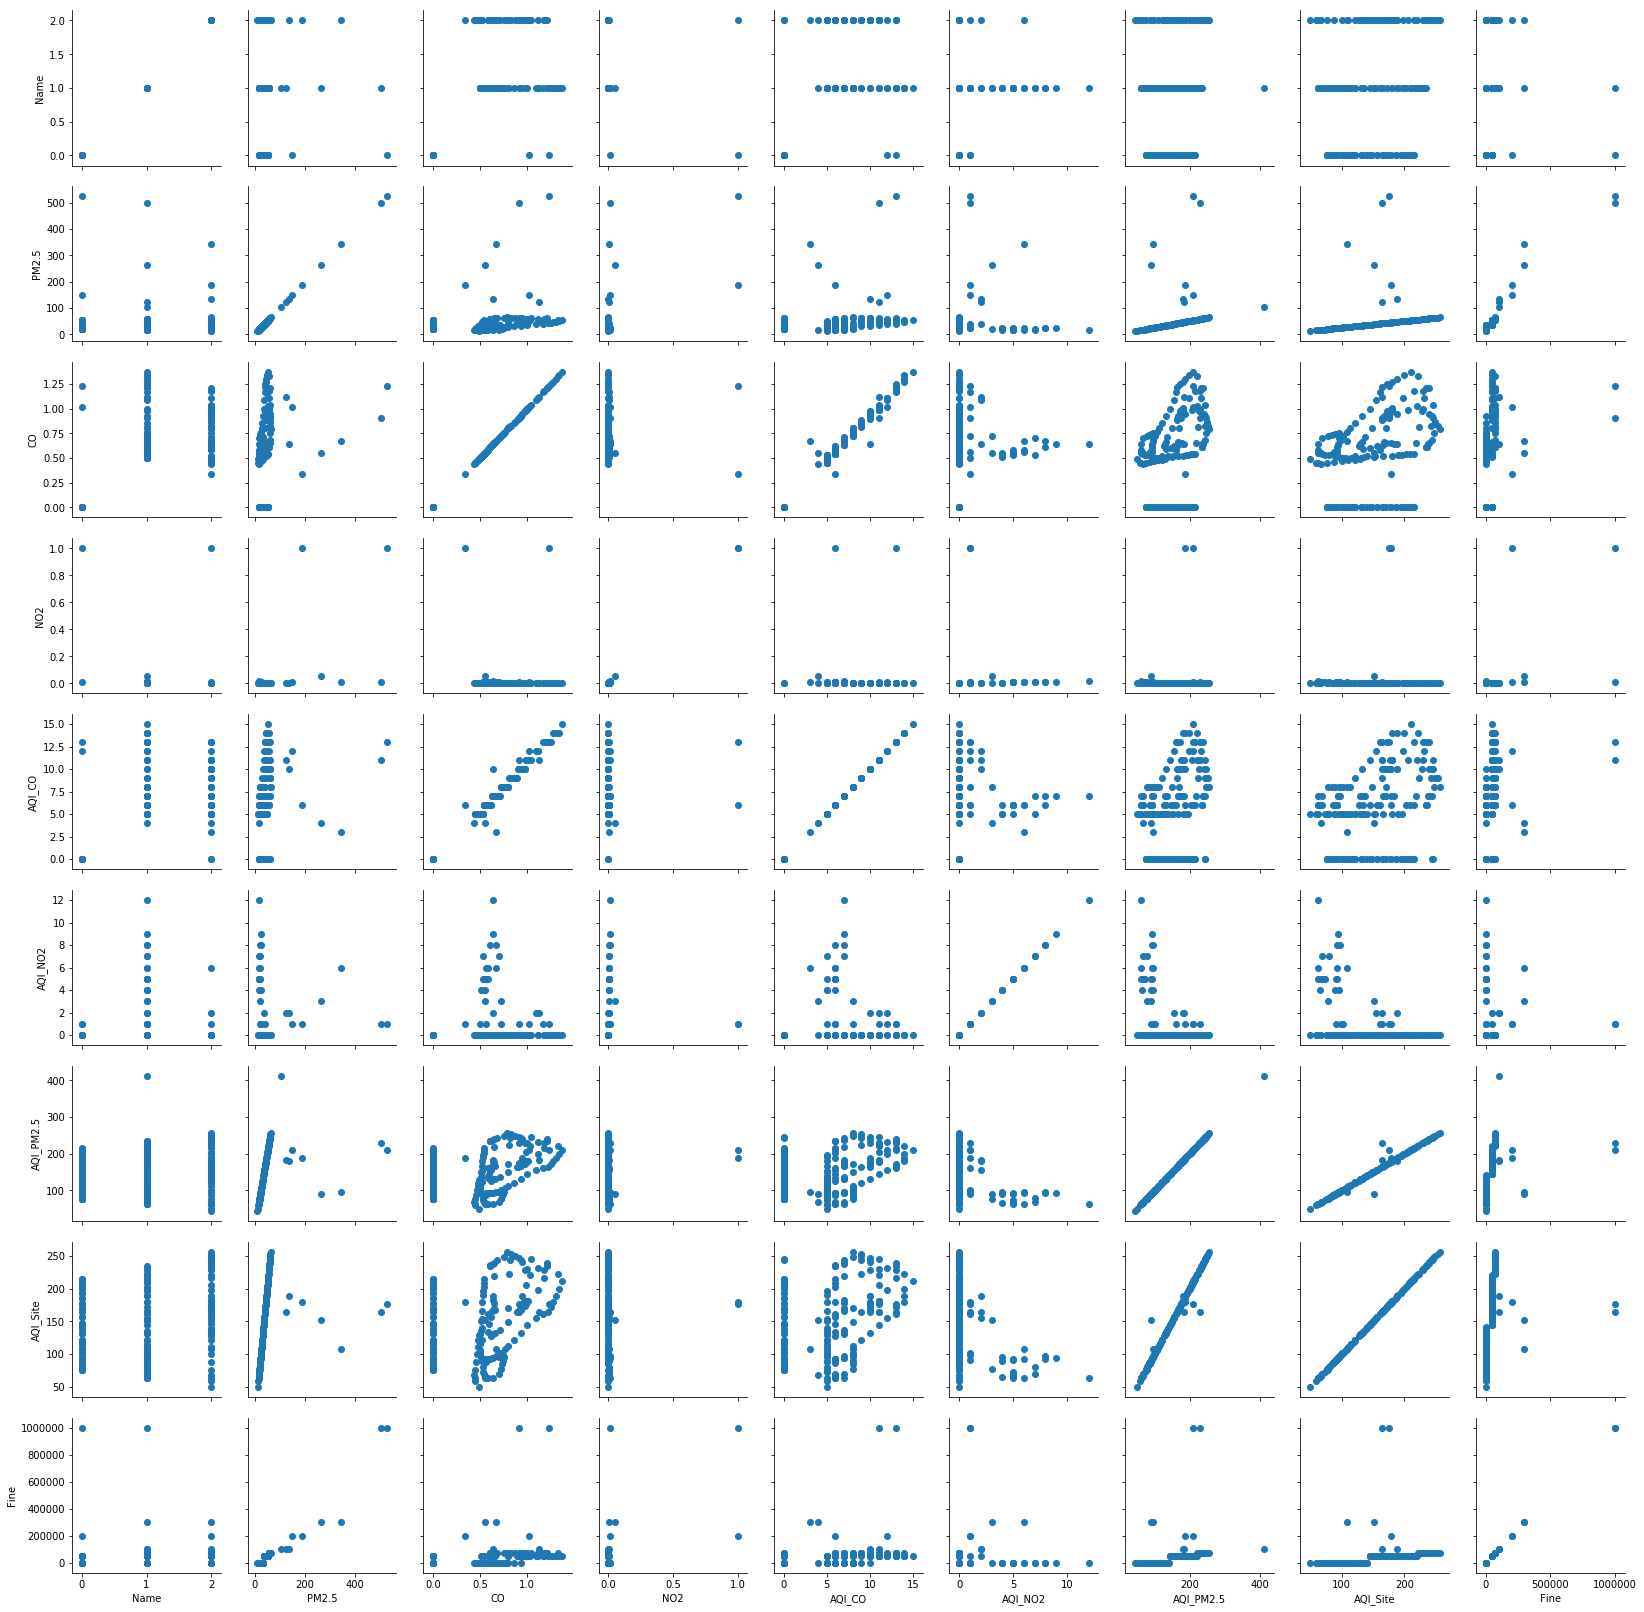

In [17]:
#PairGrid
import seaborn as sns
g=sns.PairGrid(dataset)
g.map(plt.scatter)

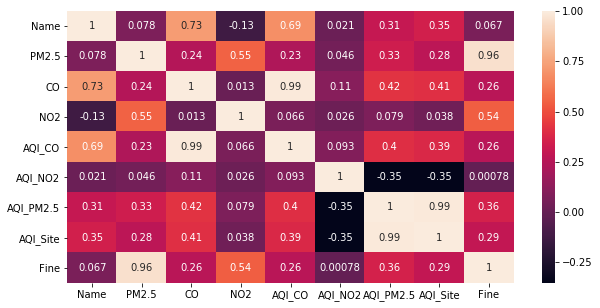

In [18]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


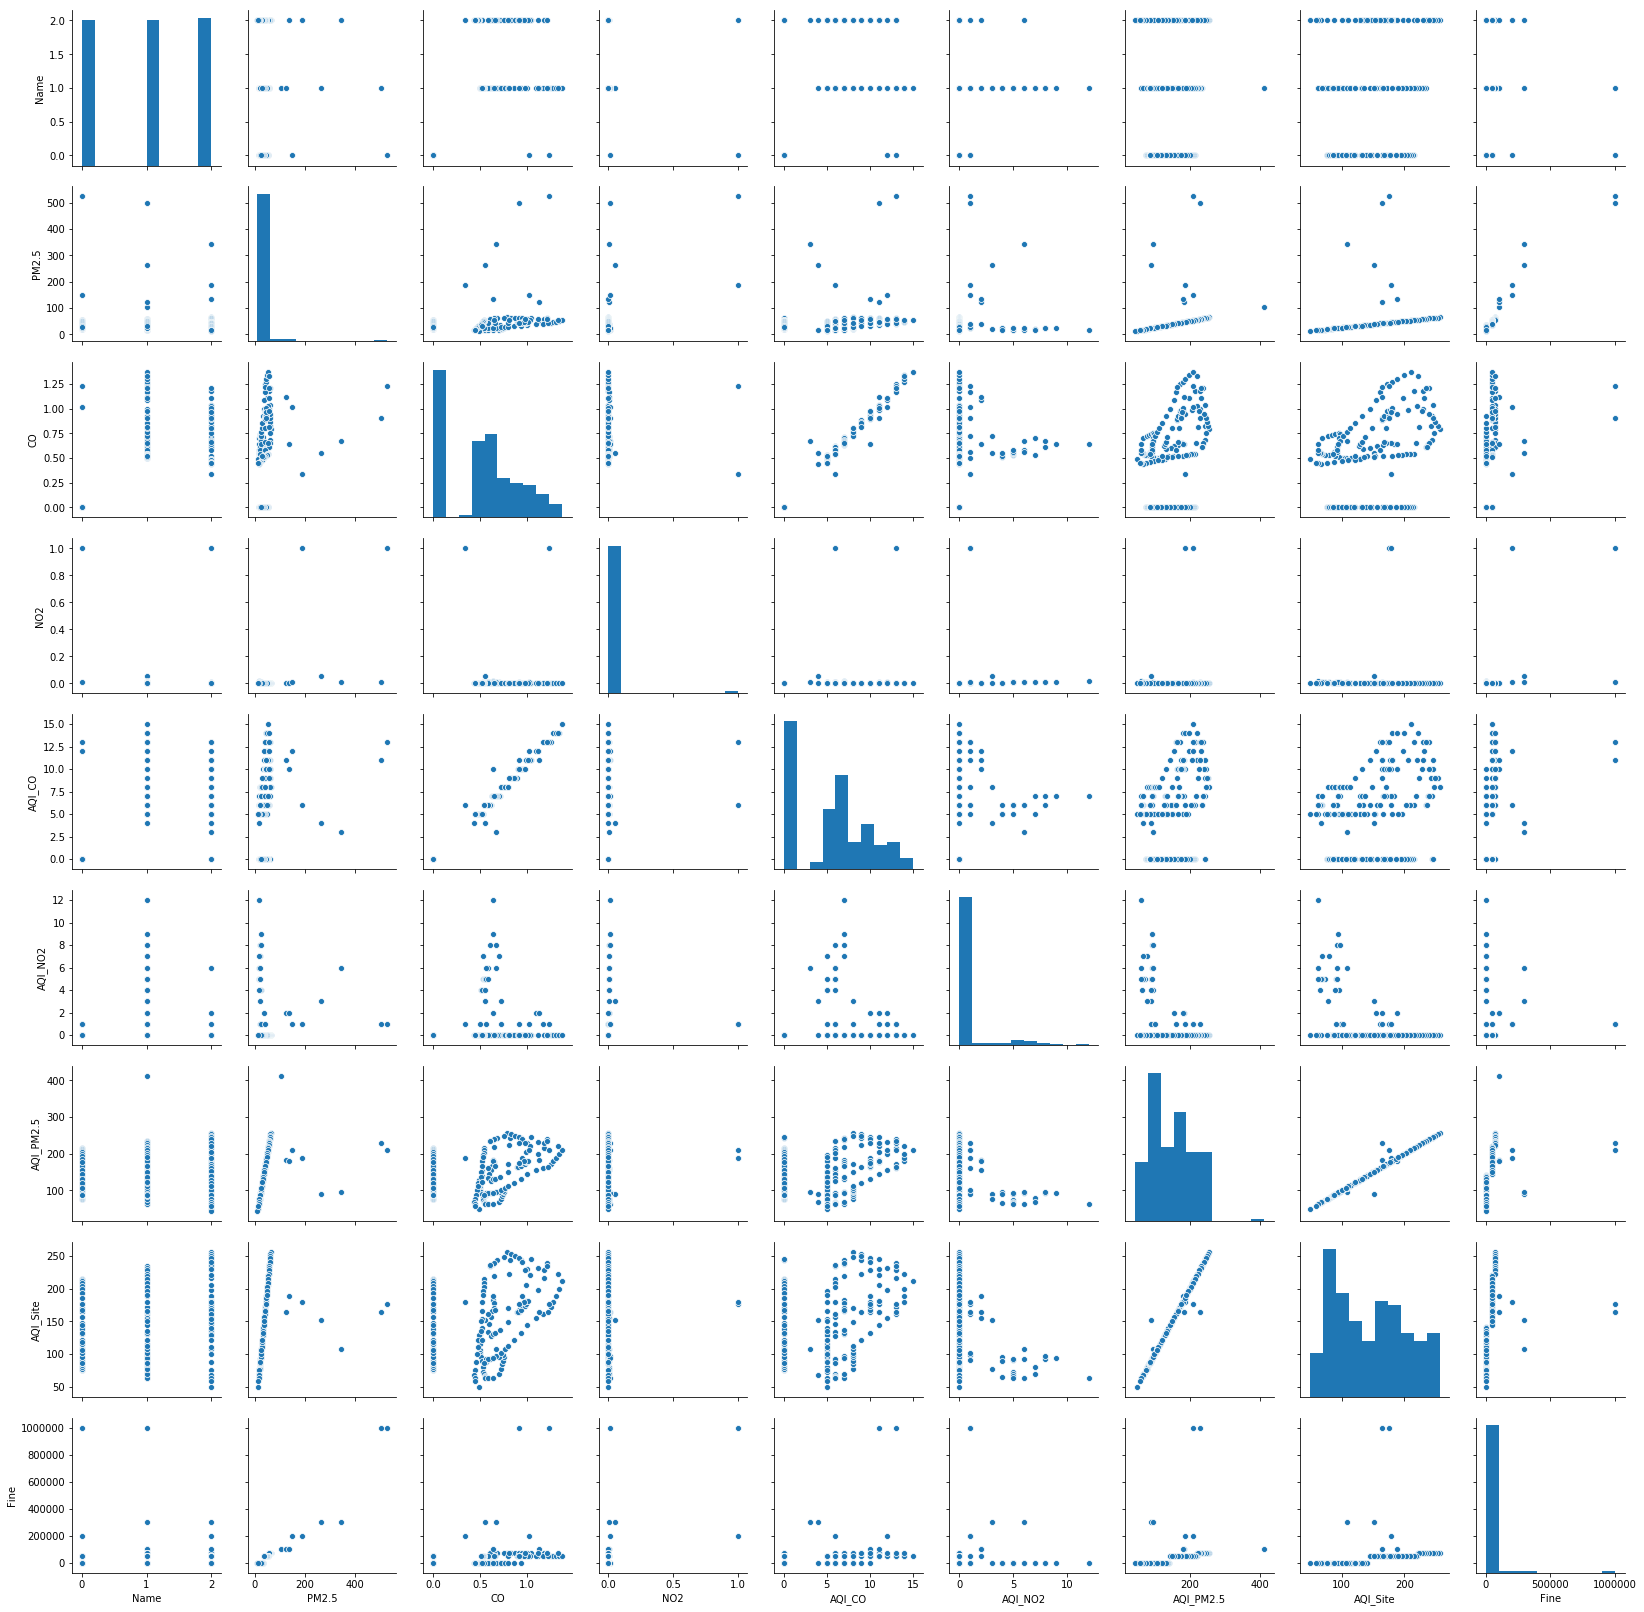

In [19]:
#Pairplot
import seaborn as sns
sns.pairplot(dataset)

In [20]:
X_test.shape

(42, 2)

In [21]:
y_test.shape

(42,)

In [22]:
X_train.shape

(166, 2)

In [23]:
y_train.shape

(166,)

In [24]:
import pickle
s = pickle.dumps(regressor)

In [25]:
from sklearn.externals import joblib
joblib.dump(regressor, 'filename.pkl')

['filename.pkl']

In [26]:
get_ipython().system(u'pip install watson-machine-learning-client --upgrade')

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.0.378)


In [27]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-03-27 13:06:50,746 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [28]:
wml_credentials={
  
  "apikey": "rEqfCEOwZ92kyEhLWyjDB7DWSg0fYaWgriOn21XCAd2p",
  "iam_apikey_description": "Auto-generated for key 4998326c-a7c9-4aa5-9f6a-ea245f1d9a21",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fc621e5a72e54b0bb91bd0137e9db4cf::serviceid:ServiceId-9adce1c0-a3bf-42f1-a2bf-c55bc2cc984b",
  "instance_id": "23a85c54-1304-4715-93a0-2ec64495cd56",
  "url": "https://eu-gb.ml.cloud.ibm.com"

}


In [29]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [30]:
instance_details = client.service_instance.get_details()

In [31]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "IBM", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "yaminireddyIBM@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Random_Forest_Regression"}

In [32]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [33]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [34]:
client.repository.list_models()

------------------------------------  ------------------------  ------------------------  -----------------
GUID                                  NAME                      CREATED                   FRAMEWORK
177d681d-63e1-4660-979a-9f6a3e7df308  Random_Forest_Regression  2020-03-27T13:06:50.958Z  scikit-learn-0.20
------------------------------------  ------------------------  ------------------------  -----------------


In [35]:
loaded_model = client.repository.load(published_model_uid)

In [36]:
created_deployment = client.deployments.create(published_model_uid, name="Random_Forest_Regression")



#######################################################################################

Synchronous deployment creation for uid: '177d681d-63e1-4660-979a-9f6a3e7df308' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2f64d286-4e16-472a-a119-2bfa3192d491'
------------------------------------------------------------------------------------------------




In [37]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [38]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/23a85c54-1304-4715-93a0-2ec64495cd56/deployments/2f64d286-4e16-472a-a119-2bfa3192d491/online'

In [39]:
client.deployments.list()

------------------------------------  ------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                      TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
2f64d286-4e16-472a-a119-2bfa3192d491  Random_Forest_Regression  online  DEPLOY_SUCCESS  2020-03-27T13:08:13.848Z  scikit-learn-0.20  model
------------------------------------  ------------------------  ------  --------------  ------------------------  -----------------  -------------


In [40]:
scoring_payload = {"fields": ["Name","PM2.5"],"values": [[0,36]]}

In [41]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [42]:
predictions

{'fields': ['prediction'], 'values': [[50000.0]]}

In [43]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/23a85c54-1304-4715-93a0-2ec64495cd56/deployments/2f64d286-4e16-472a-a119-2bfa3192d491/online'